In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',25)
pd.set_option('display.max_rows',400)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Concrete_Data_Yeh.csv')

In [3]:
df.shape

(1030, 9)

In [4]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

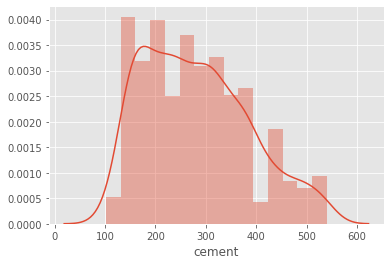

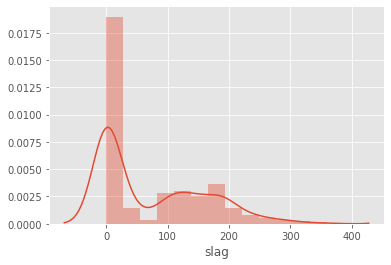

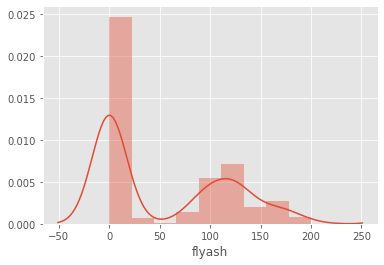

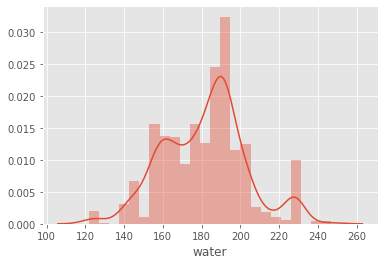

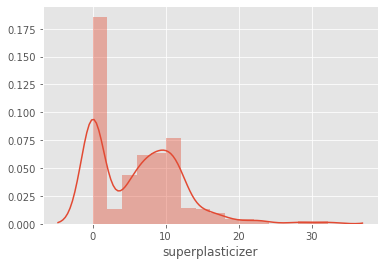

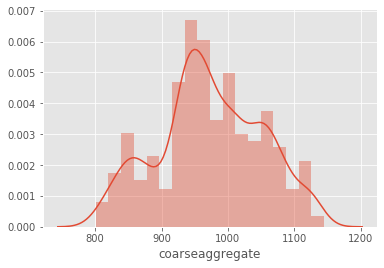

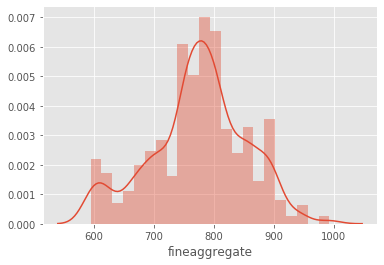

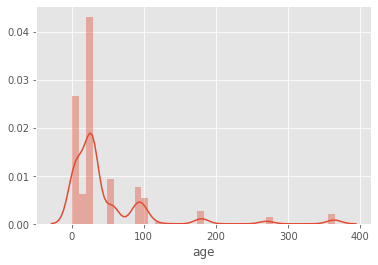

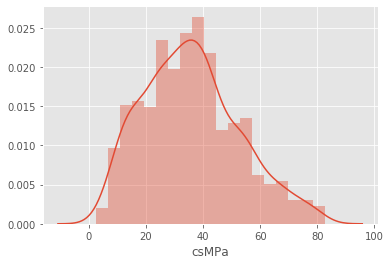

In [7]:
#View Distributions for for all variables
for col in df.columns:
    plt.figure()
    sns.distplot(df[col])

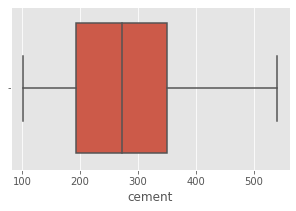

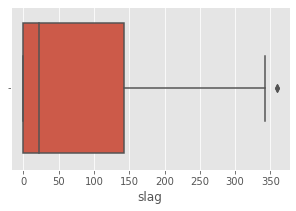

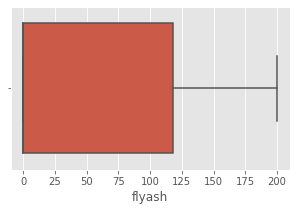

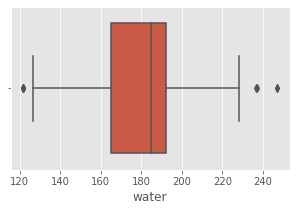

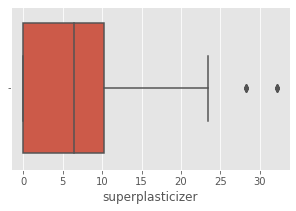

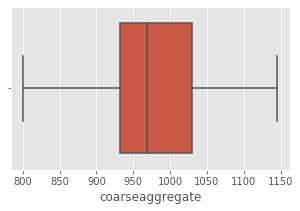

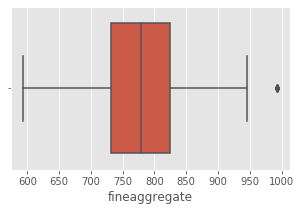

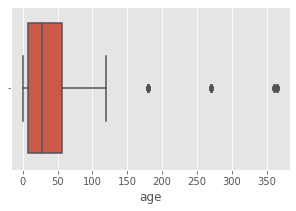

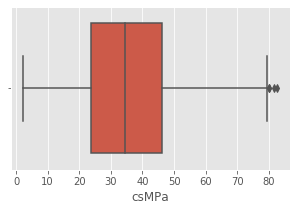

In [8]:
#Plot boxplots to view outliers in each variable
for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col])

In [9]:
#Top and bottom coding on all variables
def outliers(data,col):
    inner = data[col].quantile(0.75) - data[col].quantile(0.25)
    df_new = data.drop(data[(data[col] > data[col].quantile(0.75) + (inner*1.5)) | \
                      (data[col] < data[col].quantile(0.25) - (inner*1.5))].index,inplace=True)
    return df_new


In [10]:
#Trim all outleirs
for colum in df.columns[:-1]:
    print(colum)
    outliers(df,colum)


cement
slag
flyash
water
superplasticizer
coarseaggregate
fineaggregate
age


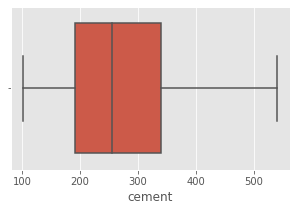

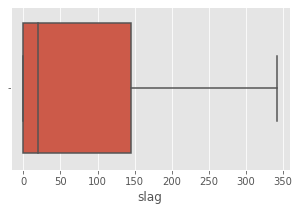

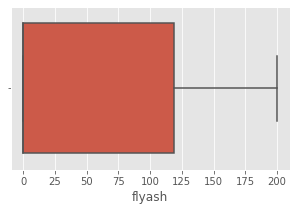

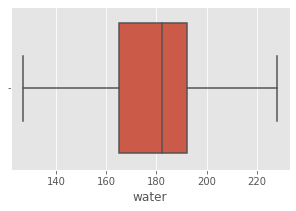

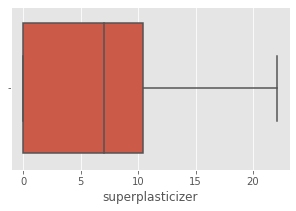

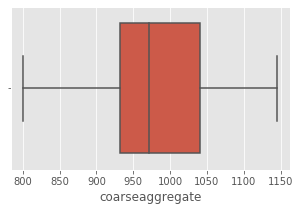

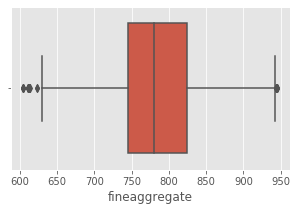

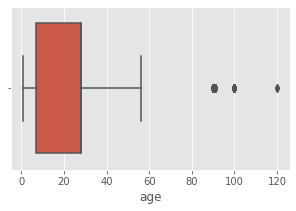

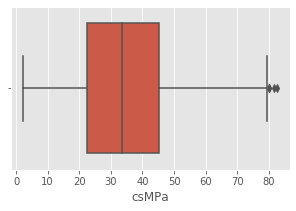

In [11]:
for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col])

In [12]:
df.shape

(930, 9)

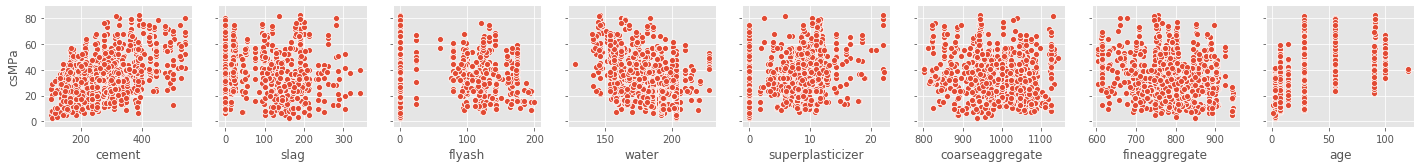

In [13]:
sns.pairplot(df,x_vars=df.columns[:-1],y_vars='csMPa')

(0, 9)

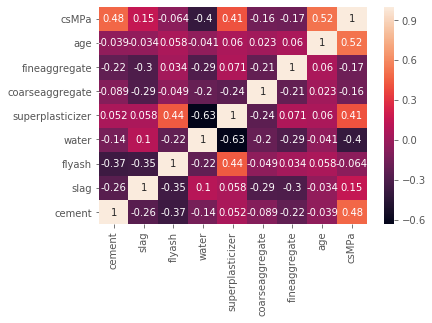

In [14]:
#View heatmap for correlation between variables.
sns.heatmap(df.corr(),annot=True)
plt.ylim(0,9)

In [15]:
X = df.drop(['csMPa'],axis=1)
y = df['csMPa']

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
#Train and Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.25)

In [18]:
#Linear Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = lr.predict(X_test)

In [20]:
lr.score(X_test,y_test)

0.7456221694636551

Text(0.5, 1.0, 'LinearRegression')

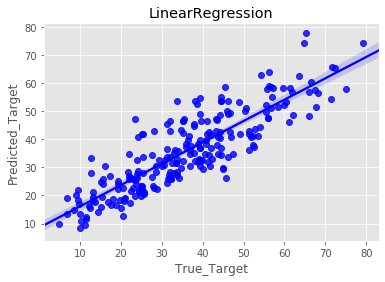

In [21]:
sns.regplot(y_test,y_pred,
           color='blue')
plt.xlabel('True_Target')
plt.ylabel('Predicted_Target')
plt.title('LinearRegression')

In [22]:
Reg_MSE= mean_squared_error(y_test, y_pred)
Reg_r2= r2_score(y_test, y_pred)

print('MSE : ',Reg_MSE, '\nR2 ',Reg_r2)

MSE :  64.07276754831183 
R2  0.7456221694636551


In [23]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [24]:
dt_pred = dt.predict(X_test)

In [25]:
dt.score(X_test,y_test)

0.7795893433958305

Text(0.5, 1.0, 'DecisoinTree')

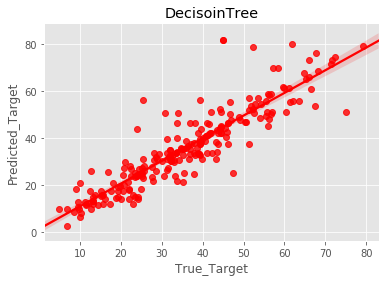

In [26]:
sns.regplot(y_test,dt_pred,
           color='red')
plt.xlabel('True_Target')
plt.ylabel('Predicted_Target')
plt.title('DecisoinTree')

In [27]:
dt_MSE= mean_squared_error(y_test, dt_pred)
dt_r2= r2_score(y_test, dt_pred)

print('MSE : ',dt_MSE, '\nR2 ',dt_r2)

MSE :  55.51710515021459 
R2  0.7795893433958305


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 5)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [29]:
rf_pred = rf.predict(X_test)

In [30]:
rf.score(X_test,y_test)

0.8565968986805489

Text(0.5, 1.0, 'RandomForest')

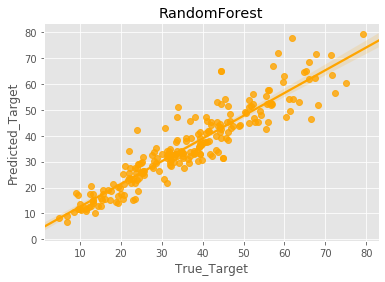

In [31]:
sns.regplot(y_test,rf_pred,
           color='orange')
plt.xlabel('True_Target')
plt.ylabel('Predicted_Target')
plt.title('RandomForest')

In [32]:
rf_MSE= mean_squared_error(y_test, rf_pred)
rf_r2= r2_score(y_test, rf_pred)

print('MSE : ',rf_MSE, '\nR2 ',rf_r2)

MSE :  36.12041803004293 
R2  0.8565968986805489


- Features Selected

In [33]:
cor = df.corr()

In [34]:
low_cor = list(cor[cor['csMPa'] < 0.4].index)

In [35]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90,38.07


In [36]:
df_filtr = df.drop(low_cor,axis=1)

In [37]:
X_fil = df_filtr.drop('csMPa',axis=1)
X_fil = np.array(X_fil)

In [38]:
y_fil = df_filtr['csMPa']
y_fil = np.array(y_fil)

In [39]:
X_fil_train, X_fil_test, y_fil_train, y_fil_test = train_test_split(X_fil,y_fil,random_state=0,test_size=0.25)

In [40]:
#LinearRegression on filtered df
lr_fil=LinearRegression()
lr_fil.fit(X_fil_train,y_fil_train)
pred_lr = lr_fil.predict(X_fil_test)

#DecisionTree on filtered df
dt_fil = DecisionTreeRegressor()
dt_fil.fit(X_fil_train,y_fil_train)
pred_dt = dt_fil.predict(X_fil_test)

#RandomForest on filtered df
rf_fil = RandomForestRegressor(n_estimators=5)
rf_fil.fit(X_fil_train,y_fil_train)
pred_rf = rf_fil.predict(X_fil_test)

In [41]:
print('Linear Model score :', lr_fil.score(X_fil_test,y_fil_test),
     '\nDecision Tree score :', dt_fil.score(X_fil_test,y_fil_test),
     '\nRandom Forest score :', rf_fil.score(X_fil_test,y_fil_test))

Linear Model score : 0.6190670288563414 
Decision Tree score : 0.621862568656075 
Random Forest score : 0.787017865565222
